# Joining Data with Pandas

## Chapter 1 - Data Merging Basics

Pandas DataFrames have a method call .merge() that the DataFrame that the .merge() method is being called from and merges it with the DataFrame provided as a keyword argument. The column to merge the DataFrame on is specified in the on= keyword argument. 

In the resulting merged DataFrame will be all the columns of both DataFrames where there is an exact match in the column named in the on= keyword argument. This is called an inner join. An inner join will only return rows that have matching values in both tables. 

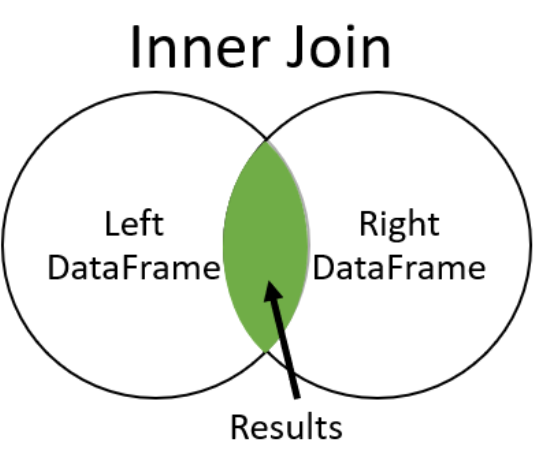

The columns from the DataFrame that the .merge() method was called against will appear first and any columns that have duplicate names will be modified with underscore x for the first DataFrame and underscore y for the second DataFrame, the one provided as the first keyword argument. Using the suffixes = keyword argument accepts a tuple of custom names to be used in place of the default x and y. 

In [24]:
import os
import pandas
os.chdir('c:\\datacamp\\data\\')
# Import pickle package
import pickle

# Open pickle file and load data: ward.p
with open('ward.p', 'rb') as file:
    wards = pickle.load(file)

print("Ward Table")
print(wards.head())
print(wards.shape)

# Open pickle file and load data: census.p
with open('census.p', 'rb') as file:
    census = pickle.load(file)

print("Census Table")
print(census.head())
print(census.shape)

wards_census = wards.merge(census, on='ward')
print(wards_census.head(4))
print(wards_census.shape)

wards_census = wards.merge(census, on='ward', suffixes = ('_ward', '_cen'))
print(wards_census.head(4))

Ward Table
  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)
Census Table
  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
(50, 6)
  ward            alder

### Exercise 1

####  Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.

__Instructions:__
* Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.
* Set the left and right table suffixes for overlapping columns of the merge to own and veh, respectively.
* Select the fuel_type column from taxi_own_veh and print the most popular fuel_types used.

In [17]:
# Open pickle file and load data: taxi_owners.p
with open('taxi_owners.p', 'rb') as file:
    taxi_owners = pickle.load(file)

    # Open pickle file and load data: taxi_vehicles.p
with open('taxi_vehicles.p', 'rb') as file:
    taxi_veh = pickle.load(file)
    
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on= 'vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on= 'vid', suffixes = ('_own', '_veh'))

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

# Print the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')
Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


#### Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge shown in the video lesson between the wards and census tables. You will alter the tables and examine how this affects the merge between them. The wards and census tables have been loaded for you.

For this exercise, it is important to know that both tables start with 50 rows, and are reset back to their original values after each Step.

__Instructions:__
* Merge wards and census on the ward column and save the result to wards_census.
* In the wards table, within the ward column, change the value of '1' to '61'.
* In the census table (not ward), within the ward column, change the value of '1' to None.
* Print the shape of the wards_census.

In [54]:
# Open pickle file and load data: ward.p
with open('ward.p', 'rb') as file:
    wards = pickle.load(file)

# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print(wards_census.shape)

(50, 9)


In [52]:
# In the ward column change '1' to '61'
wards.loc[wards['ward'] == '1', ['ward']] = '61'

# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print(wards_census.shape)

(49, 9)


In [55]:
# Open pickle file and load data: ward.p
with open('ward.p', 'rb') as file:
    wards = pickle.load(file)

# Change '1' to None in `ward` col
census.loc[census['ward'] == '1', ['ward']] = None

# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print(wards_census.shape)

(49, 9)


Great job! In step 1, the .merge() returned a table with the same number of rows as the original wards table. However, in steps 2 and 3 after altering the ward column in one table but not altering the other, the number of returned rows was fewer. Remember that .merge() only returns rows where the values match in both tables.

### One to One Relationships

In a one to one relationship between tables, every row in the left table is related to only one row in the right table. When looking at the census data and wards data, there is only one row in the census data that relates to the ward data.

In [57]:
# Open pickle file and load data: ward.p
with open('ward.p', 'rb') as file:
    wards = pickle.load(file)

# Open pickle file and load data: census.p
with open('census.p', 'rb') as file:
    census = pickle.load(file)

print(wards.head(4))
print(census.head(4))

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  


### One to Many Relationships

In a one to many relationship, every row in the left table is related to one or more rows in the right table. With respect to the wards data, there are many businesses within each ward. The licenses DataFrame is related to the wards DataFrame by their ward number. When merged together, the information ward 1 is repeated for every unique business that is located in ward 1. 

In [64]:
# Open pickle file and load data: licenses.p
with open('licenses.p', 'rb') as file:
    licenses = pickle.load(file)

print(licenses.head())
print(licenses.shape)
print(wards.shape)

ward_licenses = wards.merge(licenses, on='ward', suffixes = ('_ward', '_lic'))
print(ward_licenses.head())
print(ward_licenses.shape)

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
(10000, 6)
(50, 4)
  ward            alderman               address_ward zip_ward account  aid  \
0    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   12024  NaN   
1    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14446  743   
2    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14624  775   
3    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14987  NaN   
4    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   15642  814   

               business              address_lic z

### Exercise 2

#### One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

The licenses and biz_owners DataFrames are loaded for you.

__Instructions:__
* Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.
* Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df
* Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
* Use the .head() method to print the first few rows of the sorted_df.

In [70]:
# Open pickle file and load data: business_owners.p
with open('business_owners.p', 'rb') as file:
    biz_owners = pickle.load(file)

# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners)

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(by='account',ascending = False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


After merging the tables together, you counted the number of repeated rows with the combination of .groupby() and .agg() statements. You see that president, followed by secretary, are the most common business owner titles.

### Merging Multiple DataFrames
 
Sometimes multiple tables need to be merged to get a complete picture of the data. In this example, tax payer funded small business grant data is going to be added into the license and wards data. To pull all the information together, the first step is to connect the grants table to the licenses table. The safest way to merge these datasets is to merge on multiple fields, provided to the .merge() method's on= keyword argument as a list of columns names. 
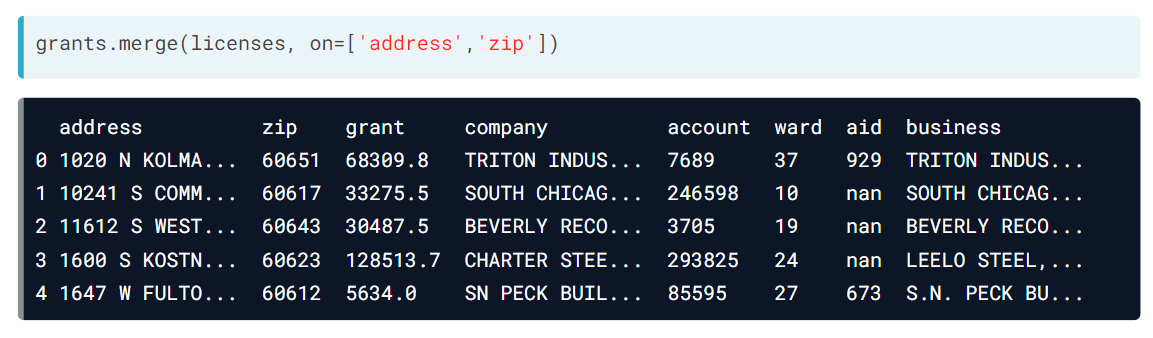

Once the first two tables are merged, that resulting merged DataFrame is then merged with the third table by chaining another .merge() method, this time identifying the third table and a column or list of columns on which to merge the datasets and using the suffixes = keyword object to identify the source of potential duplicate columns. Recall that the backslash at the end of the line indicated that the code is continued on the next line, this is used in lieu of a carriage return that would result in a syntax error. 
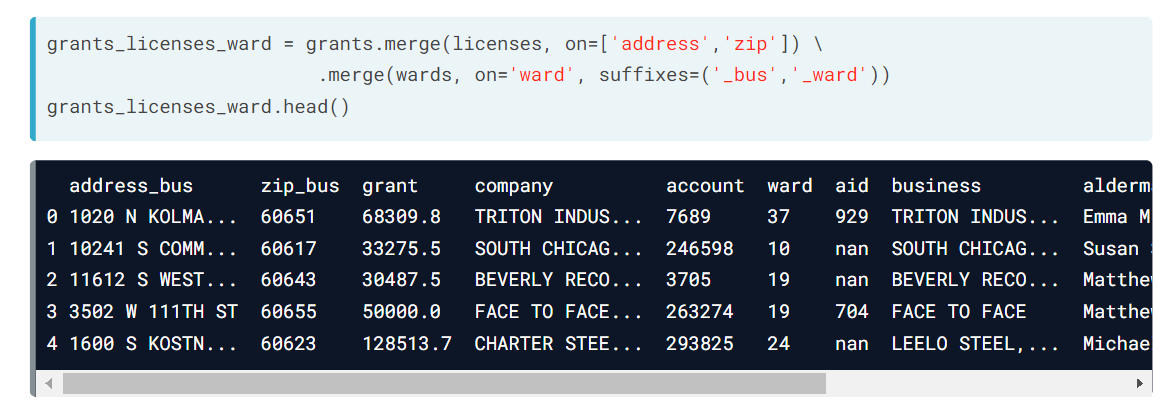

Now the grants by wards can be summed and plotted on a bar chart to show which wards receive the most grant funding.
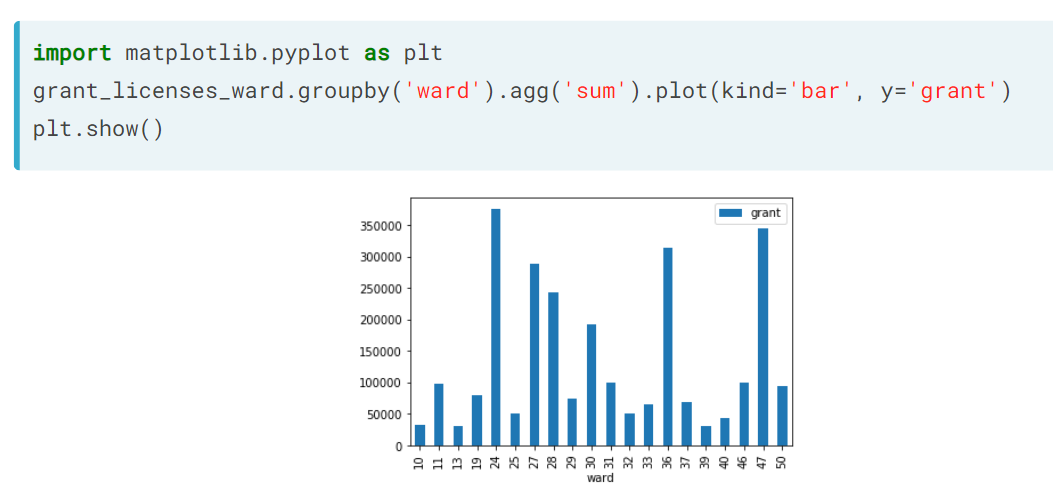

### Exercise 3

#### Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is below.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.
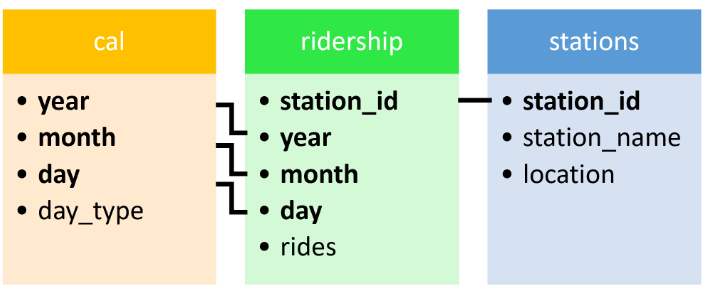

__Instructions:__
* Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect.
* Extend the previous merge to three tables by also merging the stations table.
* Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.

In [87]:
# Open pickle file and load data: cta_ridership.p
with open('cta_ridership.p', 'rb') as file:
    ridership = pickle.load(file)

#Open pickle file and load data: cta_calendar.p
with open('cta_calendar.p', 'rb') as file:
    cal = pickle.load(file)

#Open pickle file and load data: stations.p
with open('stations.p', 'rb') as file:
    station = pickle.load(file)

# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=('year','month','day'))

ridership_cal_stations = ridership.merge(cal, on=('year','month','day')).merge(station, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


#### Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

The licenses, wards, and zip_demo DataFrames have been loaded for you.

__Instructions:__
* Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.
* Group the results of the three merged tables by the column alderman and find the median income.

In [91]:
#Open pickle file and load data: zip_demo.p
with open('zip_demo.p', 'rb') as file:
    zip_demo = pickle.load(file)
    
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip').merge(wards, on = 'ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                           income
alderman                         
Ameya Pawar                 66246
Anthony A. Beale            38206
Anthony V. Napolitano       82226
Ariel E. Reyboras           41307
Brendan Reilly             110215
Brian Hopkins               87143
Carlos Ramirez-Rosa         66246
Carrie M. Austin            38206
Chris Taliaferro            55566
Daniel "Danny" Solis        41226
David H. Moore              33304
Deborah Mell                66246
Debra L. Silverstein        50554
Derrick G. Curtis           65770
Edward M. Burke             42335
Emma M. Mitts               36283
George Cardenas             33959
Gilbert Villegas            41307
Gregory I. Mitchell         24941
Harry Osterman              45442
Howard B. Brookins, Jr.     33304
James Cappleman             79565
Jason C. Ervin              41226
Joe Moore                   39163
John S. Arena               70122
Leslie A. Hairston          28024
Margaret Laurino            70122
Marty Quinn   

#### One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

The land_use, census, and licenses tables have been loaded for you.

__Instructions:__
* Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix underscore cen for the left table and undercore lic for the right table. Save this to the variable land_cen_lic.
* Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.
* Sort pop_vac_lic by vacant, account, and pop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.

In [93]:
#Open pickle file and load data: land_use.p
with open('land_use.p', 'rb') as file:
    land_use = pickle.load(file)

# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward').merge(licenses, on='ward', suffixes=('_cen', '_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010','vacant'], as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account', 'pop_2010'], ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156
